**Capstone 2: Pre-Processing**

Problem Statement: The National Transportation Safety Board (NTSB) has an Aviation Accident Database that contains information about civil aviation accidents and incidents that they investigate within the United States, its territories and international waters. For this Project, we will specifically be looking at airplane accidents for the 20 years from 2002 to 2021. The operations included are scheduled Part 121: Air Carrier, which includes most passenger airlines, as well as Part 135: Small Carrier for both commuter and ‘air taxi’ small aircraft. This dataset does not include aircraft accidents where the aircraft involved was amateur built.

**Modeling**

The dataset we're working with is trying to predict which category an accident falls into based on region/location, month, FAR Part number and type of injuries/count. Since we are working with categorical data and I have the labels, I'm going to be using these Supervised Classifcation models to see which one works best:

Random Forest <br> K-Nearest Neighbor <br> Support Vector Machine

**Initial Steps**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
X_train = pd.read_excel('data/X_train.xlsx')
X_test = pd.read_excel('data/X_test.xlsx')
y_train = pd.read_excel('data/y_train.xlsx')
y_test = pd.read_excel('data/y_test.xlsx')

**Looking at the difference models compared to each other**

Want to see in general, how these different models are going to compare to each other with this data. This will use the default parameters for each model. Will then go into each model and do train/test. Followed by hyperparameter tuning for the best one or two models.

In [16]:
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

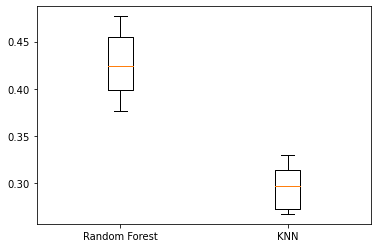

In [20]:
models = {'Random Forest': RandomForestClassifier(), 'KNN': KNeighborsClassifier(), 'SVM': SVC()}
results = []
for model in models.values():
    kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels = models.keys())
plt.show()

**Random Forest**

In [21]:
#Fit then predict the Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [23]:
#Confusion matrix and accuracy
cf_matrix = confusion_matrix(y_test, y_pred)
train_acc_rf = rf.score(X_train, y_train)
test_acc_rf = rf.score(X_test, y_test)

ValueError: multilabel-indicator is not supported

**K-Nearest Neighbor**

In [27]:
#KNN is very dependent on how many neighbors you tell it to use. So going to look at that first
neighbors = np.arange(1,20)
train_acc = {}
test_acc = {}

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_acc[n] = knn.score(X_train, y_train)
    test_acc[n] = knn.score(X_test, y_test)

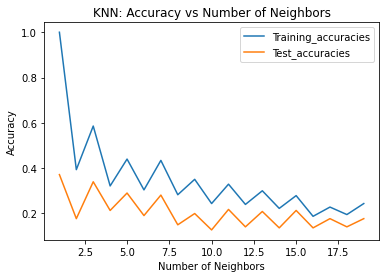

In [28]:
#Plotting the accuracies
plt.title('KNN: Accuracy vs Number of Neighbors')
plt.plot(neighbors, train_acc.values(), label = 'Training_accuracies')
plt.plot(neighbors, test_acc.values(), label = 'Test_accuracies')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Support Vector Machine**

In [ ]:
#Fit then predict SVM model


**Gradient Boost**